<a href="https://colab.research.google.com/github/boriskuchin/MADMO-BASE-2024/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22hw02_data_analysis%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание №2. Базовый анализ данных

Будем работать с датасетом пассажиров Титаника:

In [ ]:
!gdown 1Uf-MuLrsKb4p9GUKKmVYvTT_ZRO_0Kw5

Downloading...
From: https://drive.google.com/uc?id=1Uf-MuLrsKb4p9GUKKmVYvTT_ZRO_0Kw5
To: /content/titanic_train.csv
100% 60.3k/60.3k [00:00<00:00, 55.9MB/s]


Подключим нужные библиотеки:

In [ ]:
import seaborn as sns
import pandas as pd

Считаем данные:

In [ ]:
df = pd.read_csv('titanic_train.csv', index_col='PassengerId')
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Заполним пропуски медианой (для числового столбца) и модой (для строкового):

In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

## Часть 1. Анализ табличных данных

Ваша задача - провести исследование данных, выполняя предложенные задачки:

### 1. Основа

Сколько представителей каждого пола находилось на борту?

In [ ]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [ ]:
# Ваш код здесь
df.groupby(["Sex"])["Age"].count()

Sex
female    314
male      577
Name: Age, dtype: int64

In [ ]:
df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

### 2. Классовый вопрос


Найдите количества погибших и выживших по переменной `Pclass` (социально-экономический статус)

In [ ]:
# Ваш код здесь
df.pivot_table(
    values='Name',
    index='Pclass',
    columns='Survived',
    aggfunc='count'
)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Дополнительно - то же самое, но еще учитывая пол:

In [ ]:
# Ваш код здесь
df.pivot_table(
    values="Name",
    index='Pclass',
    columns=['Sex', 'Survived'],
    aggfunc='count'
)

Sex      female     male    
Survived      0   1    0   1
Pclass                      
1             3  91   77  45
2             6  70   91  17
3            72  72  300  47

### 3. Посмотрим на деньги

Сколько в среднем заплатил один пассажир?

In [ ]:
# Ваш код здесь
df["Fare"].mean()

32.204207968574636

Найдите дисперсию этой величины.

In [ ]:
# Ваш код здесь
df["Fare"].std()

49.6934285971809

Сколько все пассажиры заплатили в сумме?

In [ ]:
# Ваш код здесь
df["Fare"].sum()

28693.9493

### 4. Зависимость от возраста

Правда ли, что молодые выживали чаще (с большей вероятностью), чем старики?

Пусть "молодые" - те, кто моложе 30, а "старики" - те, кто старше 60.

In [ ]:
# Ваш код здесь
print( f'Вероятность выжить молодым {df.loc[(df["Age"] < 30) & (df["Survived"] == 1)]["Name"].count() / df.loc[(df["Age"] < 30)]["Name"].count()}')
print( f'Вероятность выжить старикам {df.loc[(df["Age"] > 60) & (df["Survived"] == 1)]["Name"].count() / df.loc[(df["Age"] > 60)]["Name"].count()}')

Вероятность выжить молодым 0.37076648841354726
Вероятность выжить старикам 0.22727272727272727


### 5. Зависимость от пола

Проверьте правда ли, что женщины выживали чаще мужчин:

In [ ]:
pivot = df.pivot_table(
    values="Name",
    index='Sex',
    columns='Survived',
    aggfunc='count'
)

total_male = pivot.sum(axis = 1).loc['male']
total = df.shape[0]
total_female = pivot.sum(axis = 1).loc['female']
survived_female = pivot.iloc[0,1]
survived_male = pivot.iloc[1,1]


print ( f'Женщины выживали в {survived_female/total_female:.2%} случаев')
print ( f'Мужчины выживали в {survived_male/total_male:.2%} случаев')
print ( f'{"Правда" if survived_female/total_female > survived_male/total_male else "Неправда"} что женщины выживали чаще')

Женщины выживали в 74.20% случаев
Мужчины выживали в 18.89% случаев
Правда что женщины выживали чаще


### 6. Цена жизни

Найдите средние значения и дисперсии стоимости билетов для спасенных и погибших:

In [ ]:
df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Ваш код здесь
pivot = df.pivot_table(
    values="Fare",
    index='Survived',
    aggfunc=['mean', 'std']
)
pivot

,mean,std
,Fare,Fare
Survived,,
0,22.117887,31.388207
1,48.395408,66.596998


In [ ]:
grouper = df.groupby('Survived')
grouper['Fare'].agg(['mean', 'std'])

,mean,std
Survived,,
0,22.117887,31.388207
1,48.395408,66.596998


### 7. Лучшее - детям?

Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания?

In [ ]:
pivot = df.pivot_table(
    values="Age",
    columns = "Sex",
    index='Pclass',
    aggfunc=['mean']
)
pivot

mean           
Sex        female       male
Pclass                      
1       33.978723  38.995246
2       28.703947  30.512315
3       23.572917  26.911873

In [ ]:
# Ваш код здесь
grouper = df.groupby('Pclass')
grouper['Age'].agg(['mean'])

,mean
Pclass,
1,36.812130
2,29.765380
3,25.932627


## Часть 2. Визуализация данных

### 1. Постройте попарные зависимости информативных признаков

К информативных признакам относим колонки `Survived`, `Pclass`, `Sex`, `Age`, `SibSp`, `Parch`, `Fare` и `Embarked`

`Name`, `Ticket` и `Cabin` не являются информативными для анализа данных, в них по сути находятся уникальные идентификаторы - имя, номер билета и номер каюты. По ним делать предсказания бесполезно.

В построении графика вам помогут метод `scatter_matrix ` Pandas или функция `pairplot` Seaborn:

In [ ]:
frame = df[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]

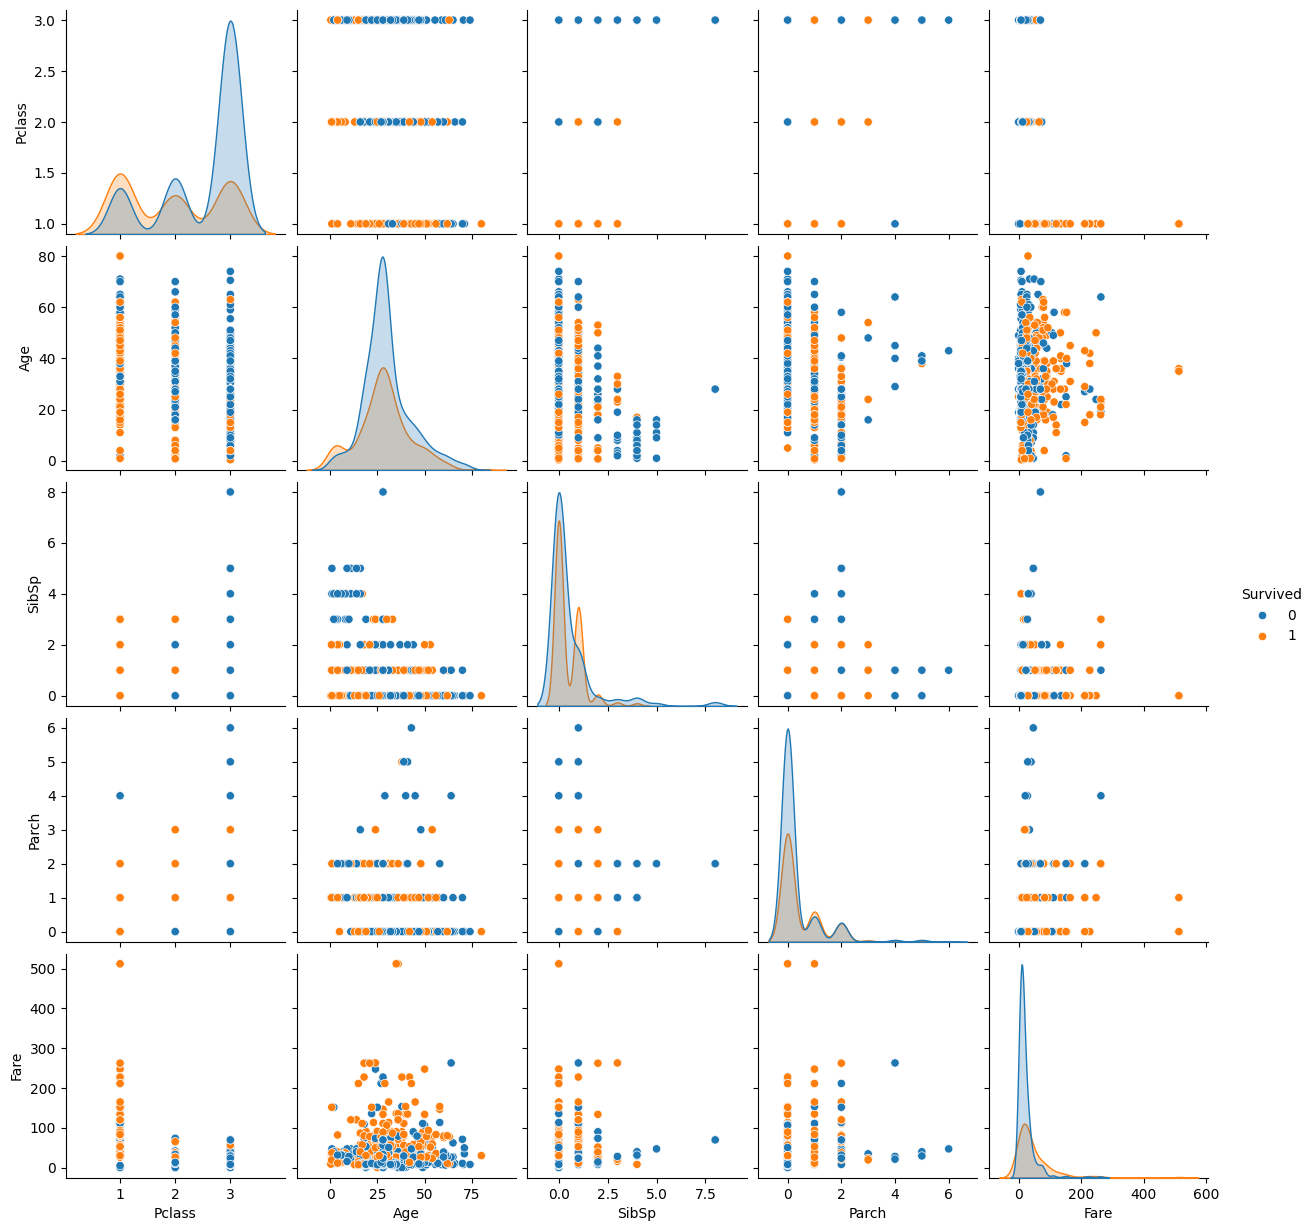

In [ ]:
# Ваш код здесь
import seaborn as sns
sns.pairplot(data=frame, hue="Survived")


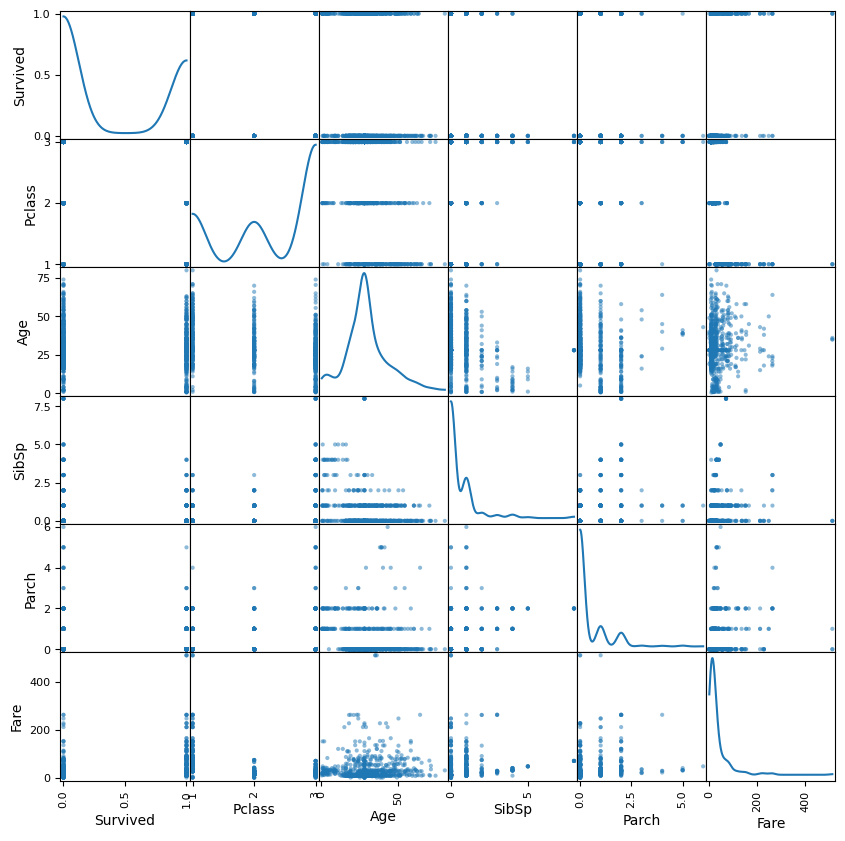

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.plotting.scatter_matrix(df, alpha=0.5, figsize=(10, 10), diagonal='kde', grid=False)
plt.show()

### 2. Рассмотрите как распределена плата за билет (`Fare`) для разных классов зависит от класса каюты (`Pclass`)

В этом поможет `sns.boxplot`:

<Axes: xlabel='Pclass', ylabel='Fare'>

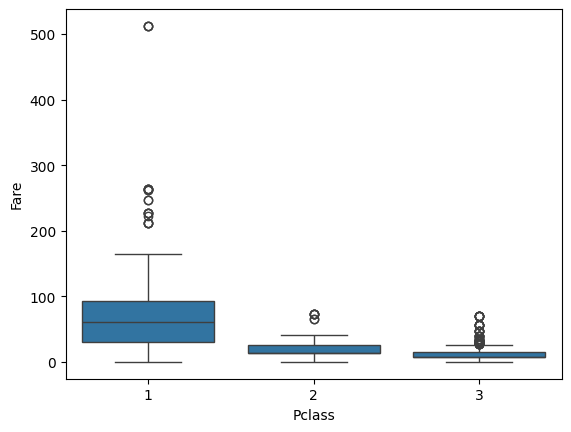

In [ ]:
# Ваш код здесь

sns.boxplot(data=df, x="Pclass", y="Fare")

### 3. Посмотрим на соотношение погибших и выживших в зависимости от пола

Отобразите c помощью `sns.countplot` c аргументом `hue`:

<Axes: xlabel='Sex', ylabel='count'>

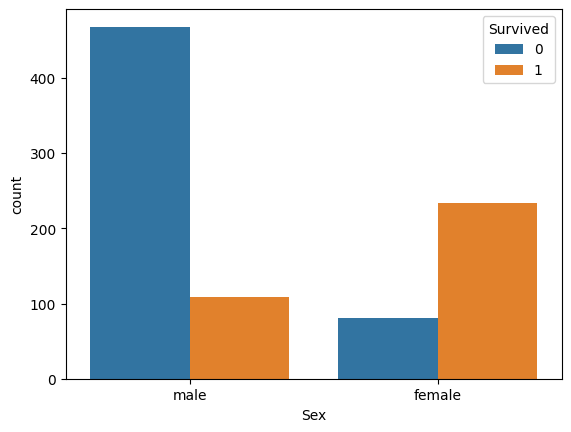

In [ ]:
# Ваш код здесь
sns.countplot(df, x="Sex", hue="Survived")

### 4. Каково соотношение погибших и выживших в зависимости от класса каюты?

Отобразите c помощью `sns.countplot` c аргументом `hue`:

<Axes: xlabel='Pclass', ylabel='count'>

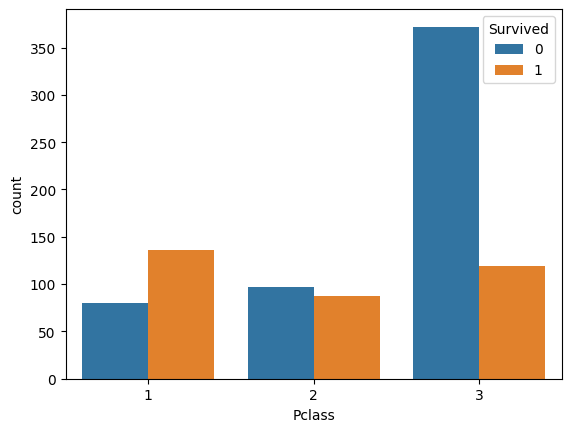

In [ ]:
# Ваш код здесь
sns.countplot(df, x="Pclass", hue="Survived")

### 5. Как выживаемость зависит от возраста пассажира?

Проверьте (графически) предположение, что молодые чаще выживали:

In [ ]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S


In [ ]:
df['Young'] = np.where(
    (df['Age'] < 30), 'Young',
                np.where(df['Age'] > 60, 'Old', "Middle"))

<Axes: xlabel='Young', ylabel='Percent'>

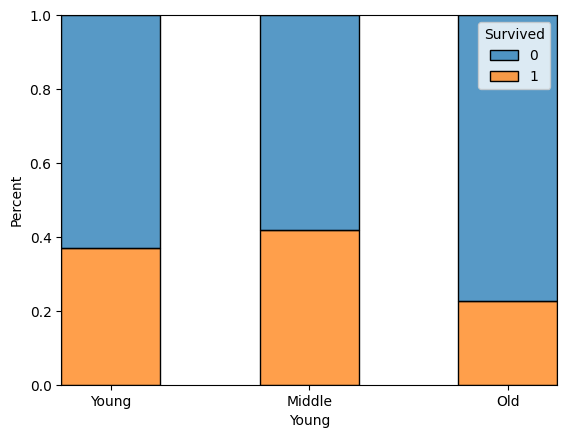

In [ ]:
sns.histplot(
    data = df,
    x='Young',
    hue='Survived',
    multiple="fill",
    stat='percent',
    shrink=0.5,

)
